In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

* With time series, our data is going to often be correlated overtime. So what happened in the prior period can end up having a large effect on what happens in the next period. So we can't just create the model as we did before with the features related to the specific outcome of that time period, but also 

* have to figure out ways to incorporate the data from other time periods

* often data has to be nn-stationary with no seasonal fluctuations or trends
We need a lot of data

* time series will be a sequence of data points that are organized in time order. That sequence will capture data at equally spaced points in time, and that should be very important whether that's months, days, weeks, minutes as we have here, as long as they are equally spaced. If the interval isnt identical then there is a missing value

## Notation

X is data
T is the entire period
t is a single period
$X_t$ is the current period
$X_{t-1}$ is the previous period
$X_{t+1}$ is the future or next period

In [101]:
df = pd.read_csv(
    "Index2018.csv",
    header=0,
)

new_df = df.copy()

In [102]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [103]:
new_df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [104]:
new_df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## Data Cleaning

In [105]:
# missing values, nan, null
new_df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Visualisation

<Axes: title={'center': 'S&P 500 Prices'}>

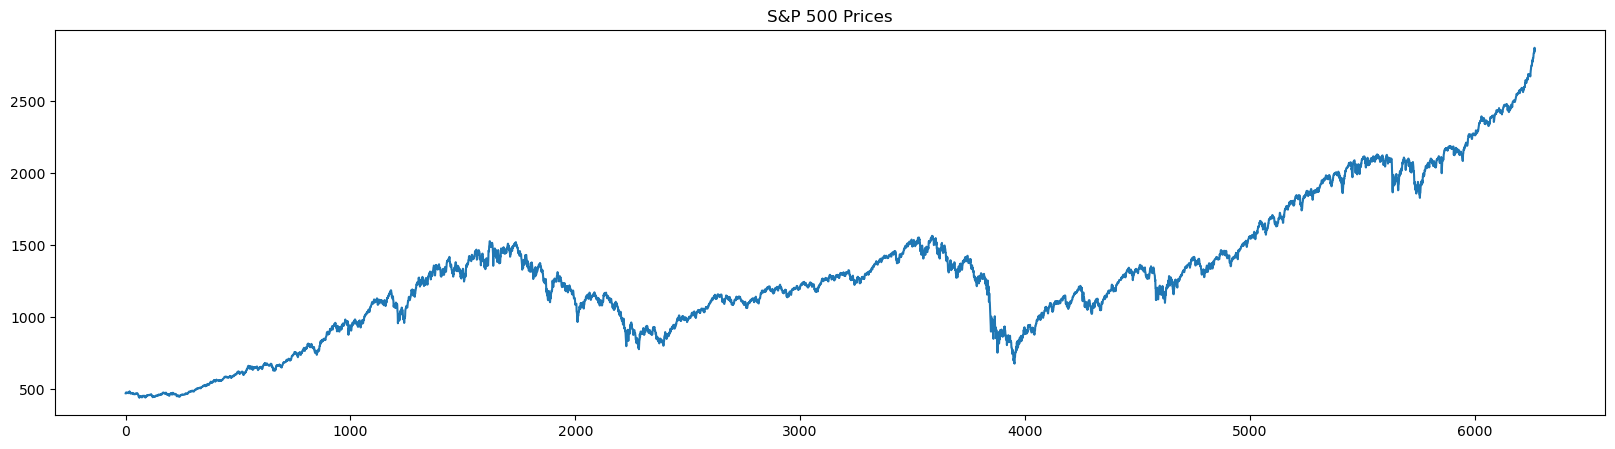

In [106]:
new_df.spx.plot(figsize=(20, 5), title="S&P 500 Prices")

<Axes: >

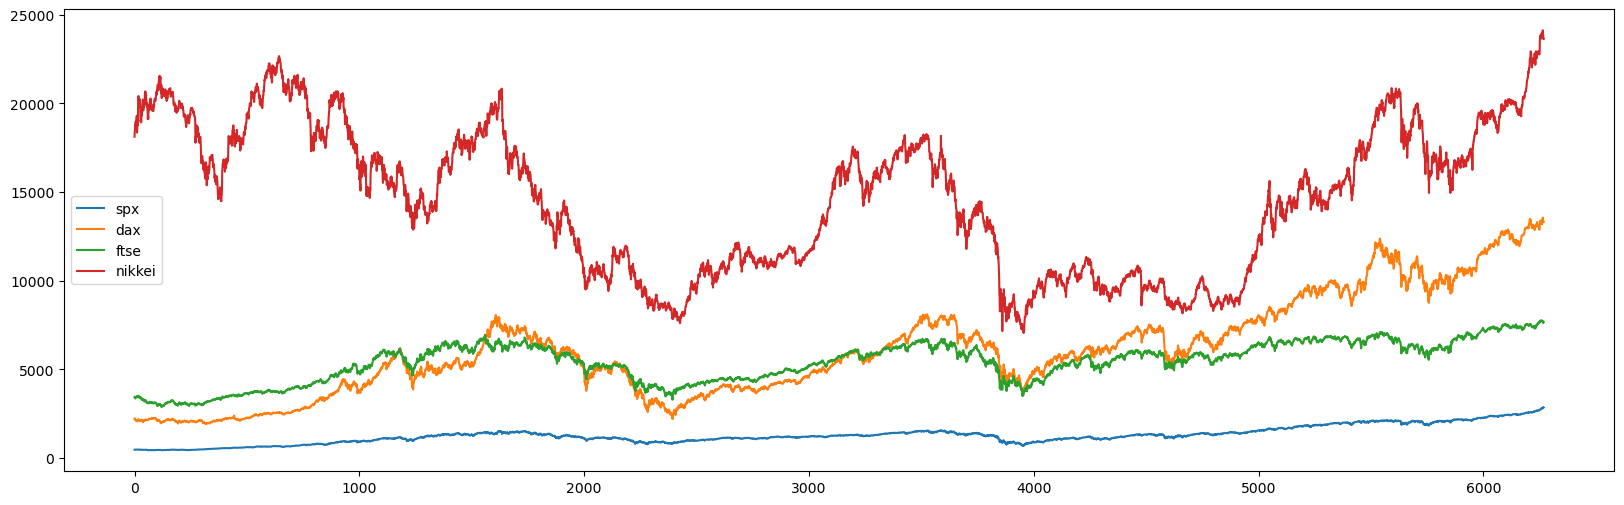

In [107]:
new_df.plot(figsize=(20, 6))

## Q-Q plot
Used to determine if a data fits a certain distribution

1. xaxis measures the standard deviation from the mean these values are
2. yaxis measures the actual values in order from lowest to highest
3. the line is the expected values if the data was normally distributed

In [108]:
import scipy.stats as stats

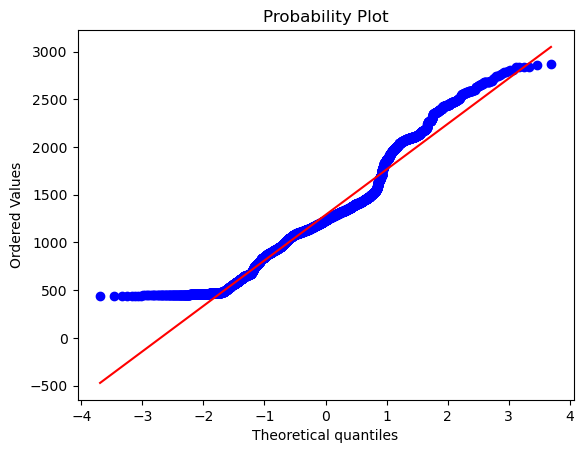

In [109]:
# this is what we expect from time series data not to be normally distributed
stats.probplot(new_df.spx, plot=plt)
plt.show()

In [110]:
new_df.date.value_counts()

date
07/01/1994    1
28/12/2009    1
28/01/2010    1
27/01/2010    1
26/01/2010    1
             ..
08/01/2002    1
07/01/2002    1
04/01/2002    1
03/01/2002    1
29/01/2018    1
Name: count, Length: 6269, dtype: int64

## Chnage to datetime object

In [111]:
new_df.date = pd.to_datetime(new_df.date, dayfirst=True)
new_df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [112]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [113]:
new_df.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

## Setting index to date 

In [114]:
new_df.set_index("date", inplace=True)
new_df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Desired Frequency

In [115]:
new_df.index

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6269, freq=None)

In [116]:
new_df = new_df.asfreq("b")  # since it is business daily data

new_df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing data

* Front filling
* Back filling
* Assigning a mean (not appropriate for time series) (value=coloumn.mean())

In [117]:
new_df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [118]:
new_df.fillna(method="ffill", inplace=True)

/tmp/ipykernel_10640/3346247488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df.fillna(method="ffill", inplace=True)


In [119]:
new_df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplify data 

To speed up computation

In [120]:
del new_df["dax"], new_df["nikkei"]

In [121]:
new_df.head()

,spx,ftse
date,,
1994-01-07,469.90,3445.98
1994-01-10,475.27,3440.58
1994-01-11,474.13,3413.77
1994-01-12,474.17,3372.02
1994-01-13,472.47,3360.01


## Spliting data without shuffling


In [122]:
size = int(len(new_df) * 0.8)
train = new_df.iloc[:size]
test = new_df.iloc[size:]

In [123]:
train.tail()

,spx,ftse
date,,
2013-04-01,1562.173837,6411.74
2013-04-02,1570.252238,6490.66
2013-04-03,1553.686978,6420.28
2013-04-04,1559.979316,6344.11
2013-04-05,1553.278930,6249.77


In [124]:
test.head()

,spx,ftse
date,,
2013-04-08,1563.071269,6276.94
2013-04-09,1568.607909,6313.20
2013-04-10,1587.731827,6387.37
2013-04-11,1593.369863,6416.14
2013-04-12,1588.854623,6384.39


## White Noise
* Const mean
* const variance
* no autocorrelations

In [125]:
wn = np.random.normal(loc=train.spx.mean(),
                      scale=train.spx.std(), size=len(train))
train["wn"] = wn

/tmp/ipykernel_10640/2245922914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["wn"] = wn


In [126]:
train.describe()

,spx,ftse,wn
count,5021.000000,5021.000000,5021.000000
mean,1091.651926,5089.640864,1092.852265
std,292.559287,1017.110427,292.075270
min,438.920000,2876.600000,162.277722
25%,914.620000,4274.040000,899.113835
50%,1144.650000,5266.060000,1093.718318
75%,1316.280729,5917.710000,1287.181143
max,1570.252238,6930.200000,2240.309230


/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/

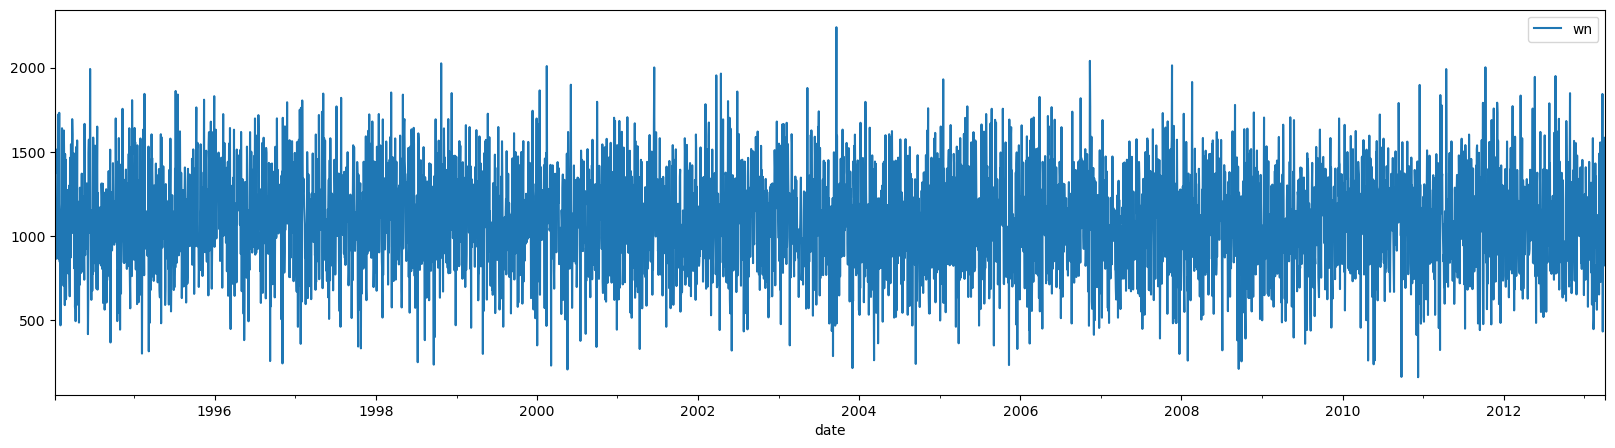

In [127]:
train.wn.plot(figsize=(20, 5), legend=True)
plt.show()

/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/

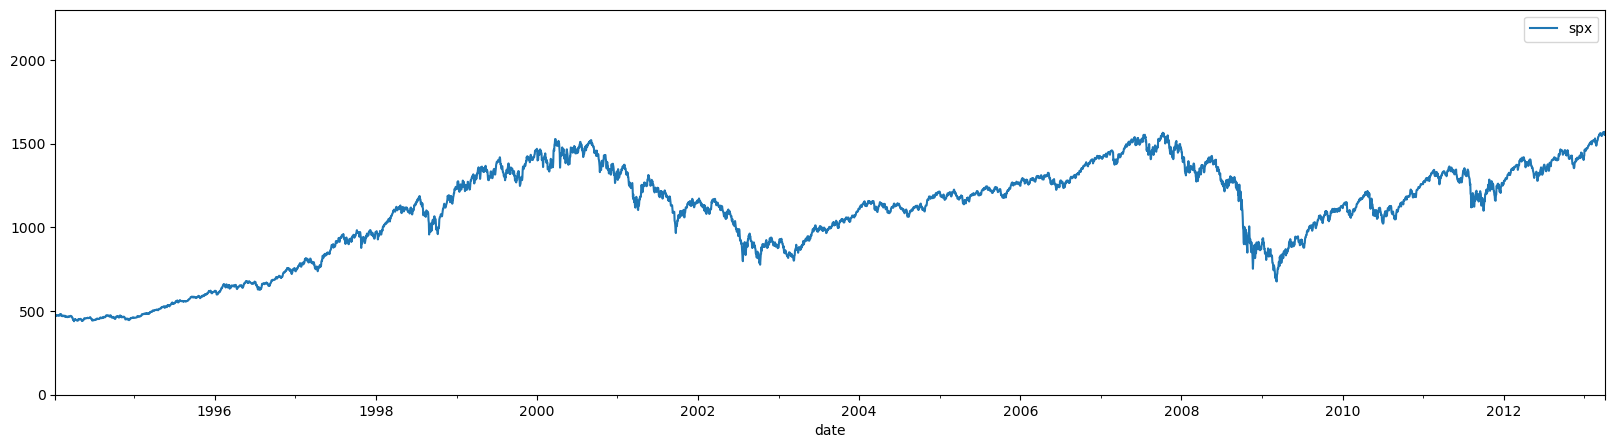

In [128]:
train.spx.plot(figsize=(20, 5), legend=True)
plt.ylim(0, 2300)
plt.show()

## Random Walk

TS where values tend to persist over time and the differences between periods are simply white noise

$P_t = P_{t-1} + \eta_t$
where $\eta_t$ are residuals which we assume are white noise

In [129]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq("b")
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [130]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [131]:
train["rw"] = rw.price
train.head()

/tmp/ipykernel_10640/4171481348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["rw"] = rw.price


,spx,ftse,wn,rw
date,,,,
1994-01-07,469.90,3445.98,974.271150,1122.139662
1994-01-10,475.27,3440.58,1157.212262,1080.347860
1994-01-11,474.13,3413.77,1095.335949,1082.095245
1994-01-12,474.17,3372.02,1120.227975,1083.639265
1994-01-13,472.47,3360.01,865.500734,1067.146255


/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/

<Axes: xlabel='date'>

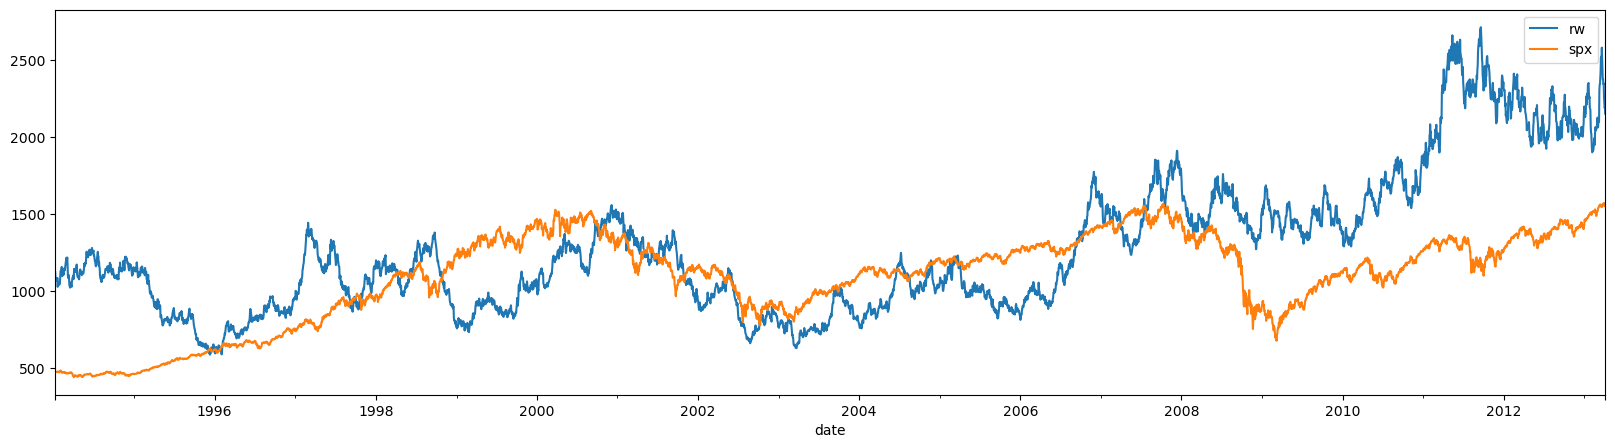

In [132]:
train.rw.plot(figsize=(20, 5), legend=True)
train.spx.plot(figsize=(20, 5), legend=True)

## Stationarity (covariance)

If two take consercutive chunks of data of identical size they should have the same covarinance

* Const mean
* Const variance
* constant covariance

An example is white noise

* Augmented Dickey-Fuller test test where the data comes from a stationary process

In [133]:
from statsmodels.tsa.stattools import adfuller

adfuller(train.spx)

(-1.7369847452352447,
 0.4121645696770616,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [134]:
adfuller(train.wn)

(-71.60253265003169,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70785.02556901472)

In [36]:
adfuller(train.rw)

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

Component of TS:
* trend - Pattern
* Seasonality - Cyclical
* residual

### Naive Decomposition

Additive
Multiplicative

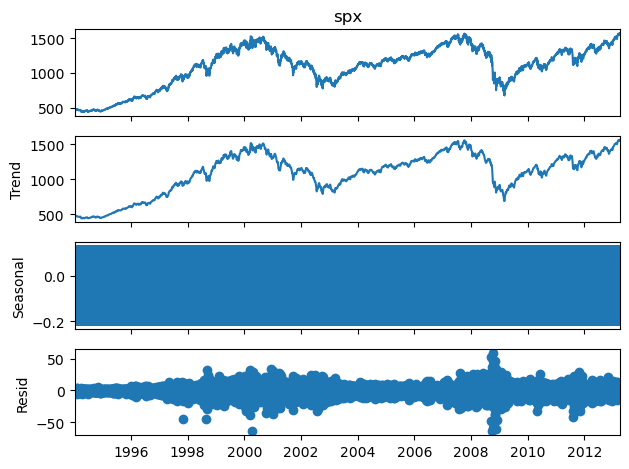

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

s_dec_additive = seasonal_decompose(train.spx, model="additive")

s_dec_additive.plot()
plt.show()

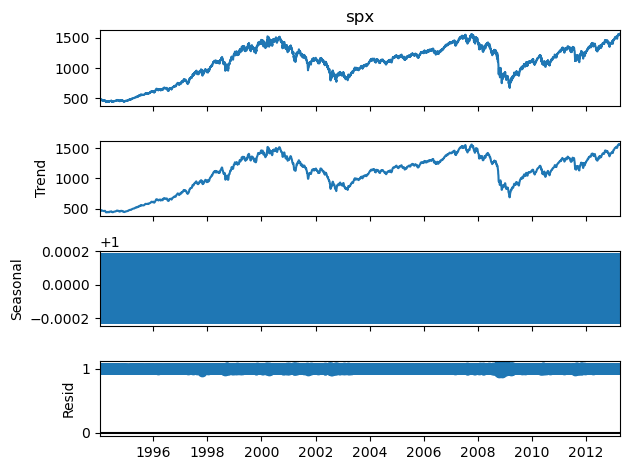

In [38]:
s_dec_multiplicative = seasonal_decompose(train.spx, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

## Auto Correlation
Measures the similarites between a sequence and itself or a lagged version of itself

### ACF

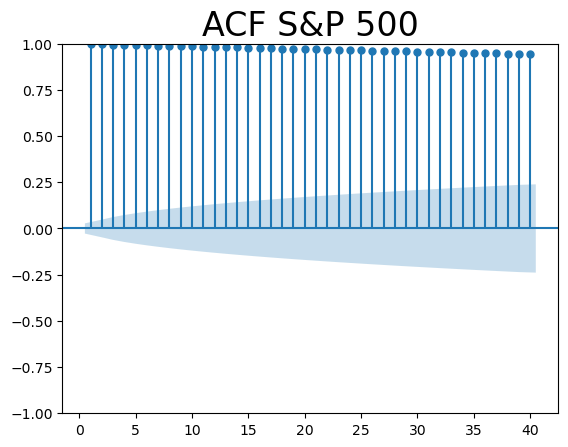

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# the effects barely deteriorate over time and the two time series are similar in the way they behave and the way past values affect present ones
plot_acf(train.spx, lags=40, zero=False)
plt.title("ACF S&P 500", size=24)
plt.show()

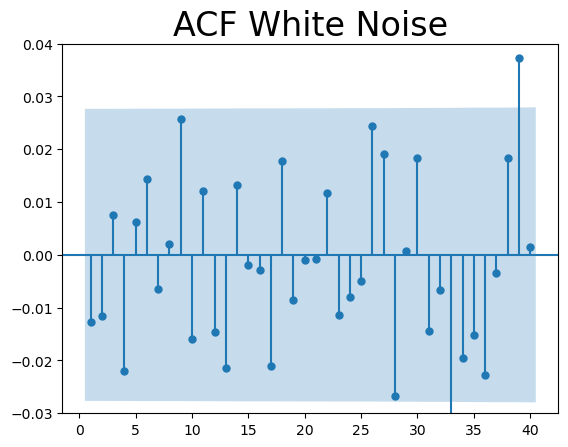

In [40]:
plot_acf(train.wn, lags=40, zero=False)
plt.ylim(-0.03, 0.04)
plt.title("ACF White Noise", size=24)
plt.show()

# No autocorrelation with past values which satisfies the definition of white noise and stationarity

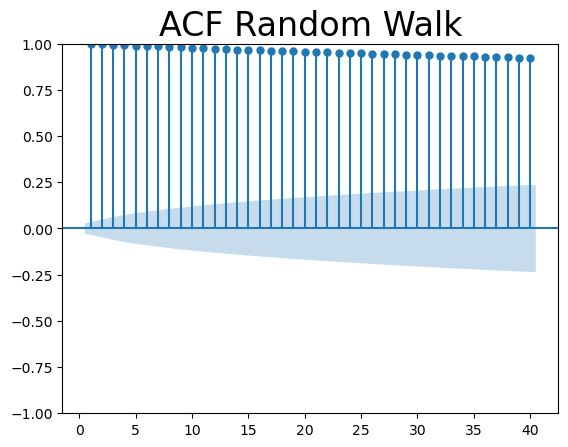

In [41]:
plot_acf(train.rw, lags=40, zero=False)
plt.title("ACF Random Walk", size=24)
plt.show()

### PACF
Probe direct significant effects of each lag on the present value and cacels all indirect effects from othe lags

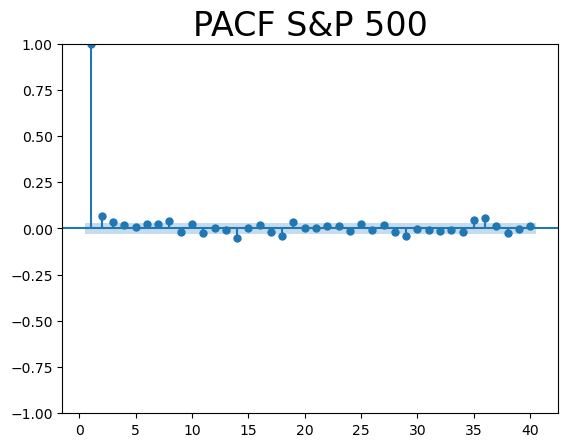

In [42]:
plot_pacf(train.spx, lags=40, zero=False, method=("ols"))
plt.title("PACF S&P 500", size=24)
plt.show()

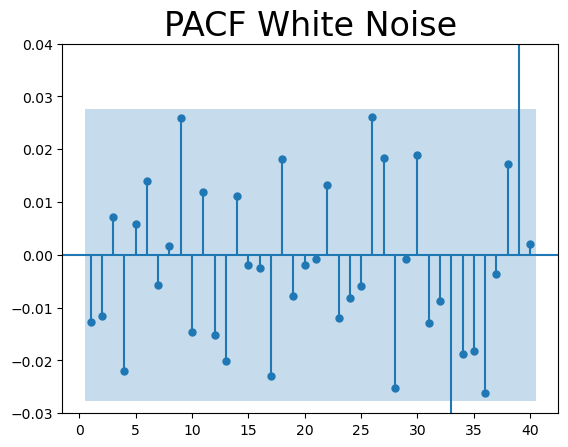

In [43]:
plot_pacf(train.wn, lags=40, zero=False, method=("ols"))
plt.title("PACF White Noise", size=24)
plt.ylim(-0.03, 0.04)
plt.show()

## Baseline models 

/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Mean Squared Error for Naive Forecast: 1.0541
Mean Squared Error for Simple Average Forecast: 0.5678
Mean Squared Error for SMA (14-day) Forecast: 0.5593
Mean Squared Error for Simple Exponential Smoothing Forecast: 0.5595


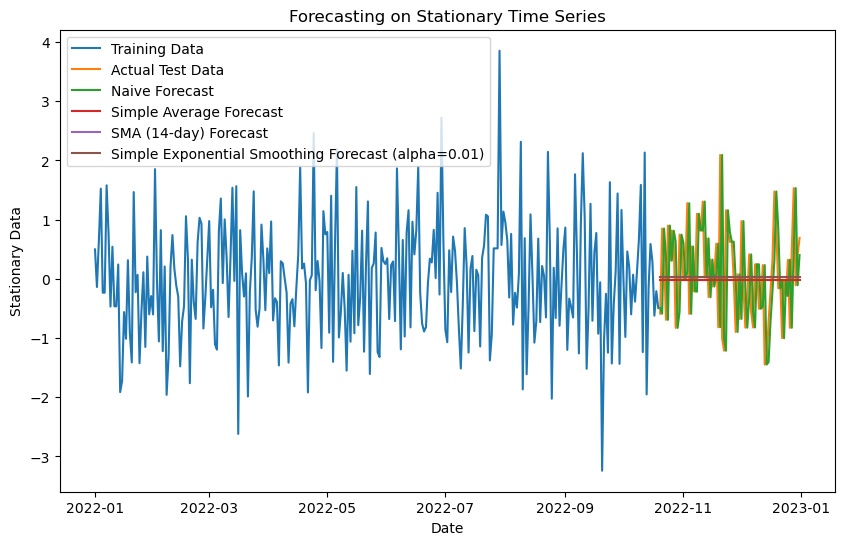

In [86]:
# Generate a sample stationary time series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

np.random.seed(42)
time_index = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
stationary_data = np.random.normal(loc=0, scale=1, size=len(time_index))

# Create a DataFrame with the time series data
df = pd.DataFrame(index=time_index, data={"Stationary_Data": stationary_data})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Naive forecast
naive_forecast = df["Stationary_Data"].shift(1)[train_size:]

# Simple average forecast
simple_avg_forecast = pd.Series(
    np.full(len(test), train["Stationary_Data"].mean()), index=test.index
)

# Simple moving average forecast
window_size = 14  # Adjust the window size as needed
sma_forecast = train["Stationary_Data"].rolling(
    window=window_size).mean().iloc[-1]
sma_forecast = pd.Series(np.full(len(test), sma_forecast), index=test.index)


# Simple Exponential Smoothing forecast
alpha = 0.01  # Adjust the smoothing parameter as needed
model = SimpleExpSmoothing(train["Stationary_Data"])
ses_model = model.fit(smoothing_level=alpha)
ses_forecast = ses_model.forecast(len(test))


# Calculate Mean Squared Error (MSE) for each technique
mse_naive = mean_squared_error(test["Stationary_Data"], naive_forecast)
mse_simple_avg = mean_squared_error(
    test["Stationary_Data"], simple_avg_forecast)
mse_sma = mean_squared_error(test["Stationary_Data"], sma_forecast)
mse_ses = mean_squared_error(test["Stationary_Data"], ses_forecast)

# Print MSE values
print(f"Mean Squared Error for Naive Forecast: {mse_naive:.4f}")
print(f"Mean Squared Error for Simple Average Forecast: {mse_simple_avg:.4f}")
print(
    f"Mean Squared Error for SMA ({window_size}-day) Forecast: {mse_sma:.4f}")
print(
    f"Mean Squared Error for Simple Exponential Smoothing Forecast: {mse_ses:.4f}")


# Plotting
# Plotting with SES forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["Stationary_Data"], label="Training Data")
plt.plot(test.index, test["Stationary_Data"], label="Actual Test Data")
plt.plot(naive_forecast.index, naive_forecast, label="Naive Forecast")
plt.plot(
    simple_avg_forecast.index, simple_avg_forecast, label="Simple Average Forecast"
)
plt.plot(sma_forecast.index, sma_forecast,
         label=f"SMA ({window_size}-day) Forecast")
plt.plot(
    ses_forecast.index,
    ses_forecast,
    label=f"Simple Exponential Smoothing Forecast (alpha={alpha})",
)
plt.legend()
plt.title("Forecasting on Stationary Time Series")
plt.xlabel("Date")
plt.ylabel("Stationary Data")
plt.show()

Double and triple smoothing performs worse because there is no trend and seasonality in the time series data

/tmp/ipykernel_10640/1338904841.py:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  des_model = model_d.fit(smoothing_level=alpha_d, smoothing_slope=beta_d)
/tmp/ipykernel_10640/1338904841.py:19: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  tes_model_fit = tes_model.fit(


Mean Squared Error for Double Exponential Smoothing Forecast: 7.3641
Mean Squared Error for Triple Exponential Smoothing Forecast: 11.1012


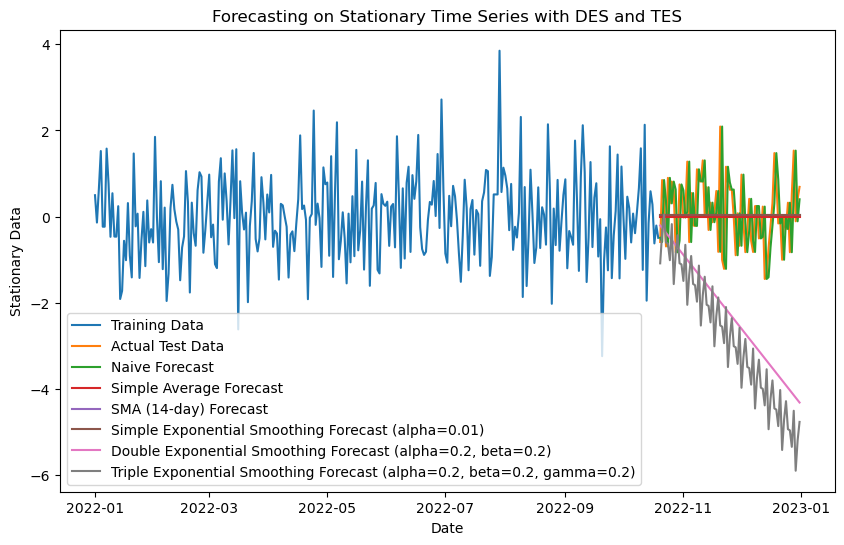

In [87]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 

# Double Exponential Smoothing (Holt's method) forecast
alpha_d = 0.2  # Smoothing parameter for level
beta_d = 0.2   # Smoothing parameter for trend
model_d = ExponentialSmoothing(train['Stationary_Data'], trend='add')
des_model = model_d.fit(smoothing_level=alpha_d, smoothing_slope=beta_d)
des_forecast = des_model.forecast(len(test))

# Triple Exponential Smoothing (Holt-Winters method) forecast
alpha_t = 0.2  # Smoothing parameter for level
beta_t = 0.2   # Smoothing parameter for trend
gamma_t = 0.2  # Smoothing parameter for seasonality
seasonal_period = 7  # Adjust as needed based on your data
tes_model = ExponentialSmoothing(
    train['Stationary_Data'], trend='add', seasonal='add', seasonal_periods=seasonal_period)
tes_model_fit = tes_model.fit(
    smoothing_level=alpha_t, smoothing_slope=beta_t, smoothing_seasonal=gamma_t)
tes_forecast = tes_model_fit.forecast(len(test))

# Calculate Mean Squared Error (MSE) for DES and TES
mse_des = mean_squared_error(test['Stationary_Data'], des_forecast)
mse_tes = mean_squared_error(test['Stationary_Data'], tes_forecast)

# Print MSE for DES and TES
print(
    f'Mean Squared Error for Double Exponential Smoothing Forecast: {mse_des:.4f}')
print(
    f'Mean Squared Error for Triple Exponential Smoothing Forecast: {mse_tes:.4f}')

# Plotting with DES and TES forecasts
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Stationary_Data'], label='Training Data')
plt.plot(test.index, test['Stationary_Data'], label='Actual Test Data')
plt.plot(naive_forecast.index, naive_forecast, label='Naive Forecast')
plt.plot(simple_avg_forecast.index, simple_avg_forecast,
         label='Simple Average Forecast')
plt.plot(sma_forecast.index, sma_forecast,
         label=f'SMA ({window_size}-day) Forecast')
plt.plot(ses_forecast.index, ses_forecast,
         label=f'Simple Exponential Smoothing Forecast (alpha={alpha})')
plt.plot(des_forecast.index, des_forecast,
         label=f'Double Exponential Smoothing Forecast (alpha={alpha_d}, beta={beta_d})')
plt.plot(tes_forecast.index, tes_forecast,
         label=f'Triple Exponential Smoothing Forecast (alpha={alpha_t}, beta={beta_t}, gamma={gamma_t})')
plt.legend()
plt.title('Forecasting on Stationary Time Series with DES and TES')
plt.xlabel('Date')
plt.ylabel('Stationary Data')
plt.show()

## Autoregressive Model (AR) for non-stationary data

$$x_t = c + \phi x_{t-1} + \eta_t$$

We use the ACF and PACF to guide the choice of lags.

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# AR(1) model
model_ar = ARIMA(train.spx, order=(1, 0, 0))

result_ar = model_ar.fit()

result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -20097.439
Date:                Wed, 14 Feb 2024   AIC                          40200.879
Time:                        09:15:41   BIC                          40220.443
Sample:                    01-07-1994   HQIC                         40207.734
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6133    165.184      6.608      0.000     767.858    1415.369
ar.L1          0.9992      0.001   1695.377      0.000       0.998       1.000
sigma2       175.2480      1.771     98.978      0.000     171.778     178.718
===================================================================================
Ljung-Box (L1) (Q):                  24.60   Jarque-Bera (JB):              7473.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model_ar2 = ARIMA(train.spx, order=(2, 0, 0))

result_ar2 = model_ar2.fit()

result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -20085.289
Date:                Wed, 14 Feb 2024   AIC                          40178.578
Time:                        09:15:43   BIC                          40204.664
Sample:                    01-07-1994   HQIC                         40187.719
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6076    223.346      4.888      0.000     653.857    1529.359
ar.L1          0.9300      0.009     99.031      0.000       0.912       0.948
ar.L2          0.0694      0.009      7.405      0.000       0.051       0.088
sigma2       174.3965      1.768     98.654      0.000     170.932     177.861
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7475.27
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
model_ar3 = ARIMA(train.spx, order=(3, 0, 0))

model_ar4 = ARIMA(train.spx, order=(4, 0, 0))

## Comparing models

In [51]:
from scipy.stats.distributions import chi2


def LLR_test(mod1, mod2, DF=1):
    """log likelihood ratio test to compare two models which tells us if the more complex model is better than the simpler one"""
    L1 = mod1.fit().llf
    L2 = mod2.fit().llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    return p

In [55]:
LLR_test(model_ar, model_ar2)

0.0

In [52]:
LLR_test(model_ar2, model_ar3)

0.032

In [53]:
LLR_test(model_ar3, model_ar4)

0.144

# Working with stationary data - using returns


In [59]:
new_df["returns"] = new_df.spx.pct_change(1).mul(100)
new_df = new_df.iloc[1:]

In [60]:
new_df.head()

,spx,returns
date,,
1994-01-10,475.27,1.142796
1994-01-11,474.13,-0.239864
1994-01-12,474.17,0.008437
1994-01-13,472.47,-0.358521
1994-01-14,474.91,0.516435


In [64]:
print(adfuller(new_df.returns), "\n", adfuller(new_df.spx))

(-14.17344727764129, 1.984825156820731e-26, 34, 6241, {'1%': -3.431398228116075, '5%': -2.8620032237533897, '10%': -2.5670165710764503}, 19221.15032513027) 
 (1.114325051647141, 0.9953370456865507, 10, 6265, {'1%': -3.4313942109103537, '5%': -2.8620014488169447, '10%': -2.5670156262352637}, 50251.15432670161)


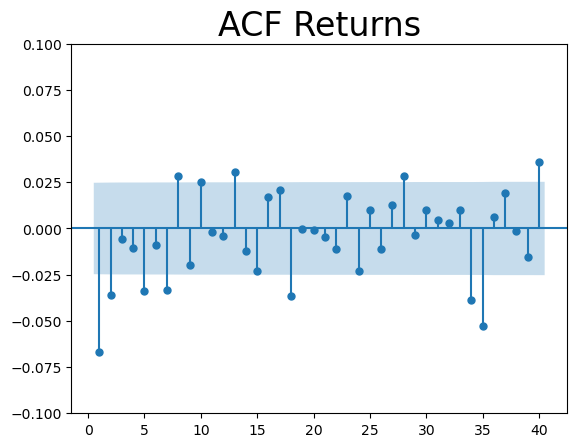

In [69]:
plot_acf(
    new_df.returns,
    lags=40,
    zero=False,
)
plt.title("ACF Returns", size=24)
plt.ylim(-0.1, 0.1)
plt.show()

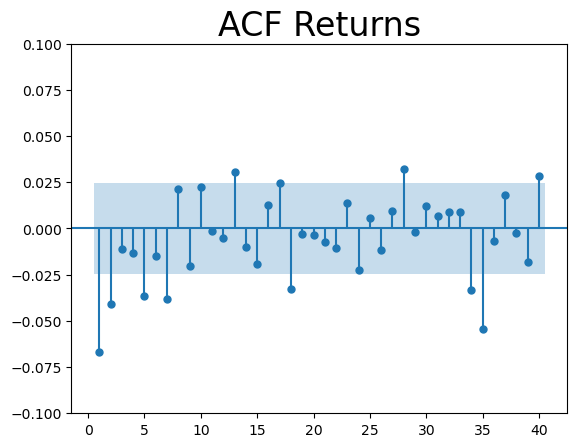

In [70]:
plot_pacf(new_df.returns, lags=40, zero=False)
plt.title("ACF Returns", size=24)
plt.ylim(-0.1, 0.1)
plt.show()

## AR models for return

In [72]:
# AR(1) model
model_ar_ret = ARIMA(new_df.returns, order=(1, 0, 0))

result_ar_ret = model_ar_ret.fit()

result_ar_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9667.195
Date:                Wed, 14 Feb 2024   AIC                          19340.391
Time:                        09:47:28   BIC                          19360.624
Sample:                    01-10-1994   HQIC                         19347.401
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0352      0.014      2.572      0.010       0.008       0.062
ar.L1         -0.0670      0.007     -9.230      0.000      -0.081      -0.053
sigma2         1.2748      0.010    131.938      0.000       1.256       1.294
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             22155.94
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Normalizing Values

In [73]:
benchmark = new_df.spx.iloc[0]

new_df["norm"] = new_df.spx.div(benchmark).mul(100)

adfuller(new_df.norm)

(1.114325051646526,
 0.9953370456865456,
 10,
 6265,
 {'1%': -3.4313942109103537,
  '5%': -2.8620014488169447,
  '10%': -2.5670156262352637},
 30795.30018838447)

In [88]:
benchmark = new_df.returns.iloc[0]
new_df["norm_ret"] = new_df.returns.div(benchmark).mul(100)
adfuller(new_df.norm_ret)

(-14.173447277641221,
 1.9848251568212422e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 75036.80983902364)

In [89]:
# AR(1) model
model_ar_ret_norm = ARIMA(new_df.norm_ret, order=(1, 0, 0))

result_ar_ret_norm = model_ar_ret_norm.fit()

result_ar_ret_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -37731.534
Date:                Wed, 14 Feb 2024   AIC                          75469.069
Time:                        12:20:31   BIC                          75489.302
Sample:                    01-10-1994   HQIC                         75476.079
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0762      1.196      2.572      0.010       0.732       5.420
ar.L1         -0.0670      0.007     -9.231      0.000      -0.081      -0.053
sigma2      9761.4841     73.986    131.937      0.000    9616.474    9906.494
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             22155.93
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals

/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/matplotlib/axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/

<Axes: xlabel='date'>

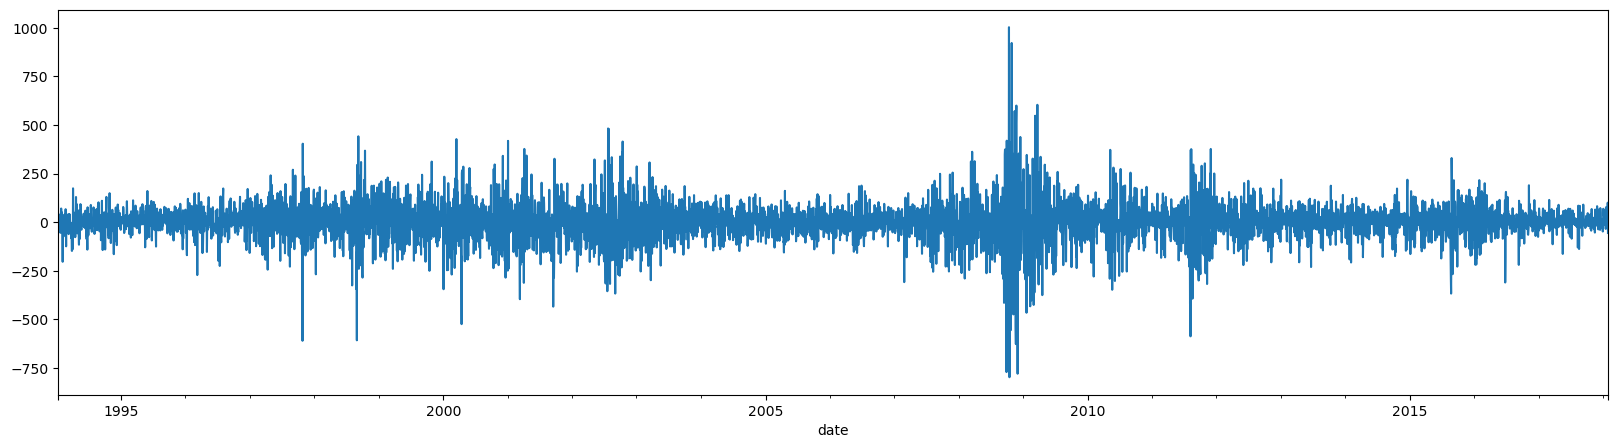

In [90]:
new_df["res_ret_norm"] = result_ar_ret_norm.resid
new_df.res_ret_norm.plot(figsize=(20, 5))

In [91]:
new_df.res_ret_norm.mean(), new_df.res_ret_norm.var()

(0.0006617903557777726, 9762.981223428491)

In [92]:
adfuller(new_df.res_ret_norm)

(-14.198845263075246,
 1.80255995356954e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 75036.5860200279)

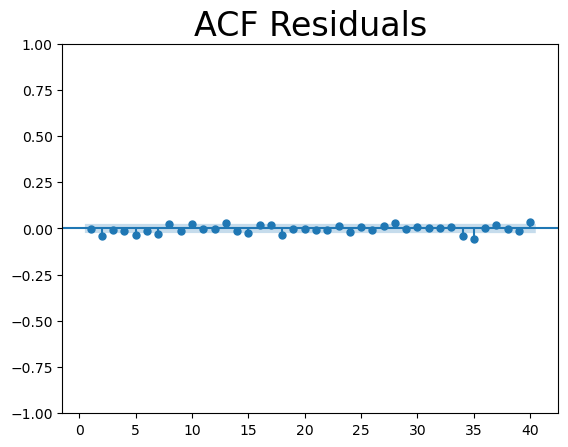

In [93]:
plot_acf(new_df.res_ret_norm, lags=40, zero=False)
plt.title("ACF Residuals", size=24)
plt.show()

## Moving Average Models

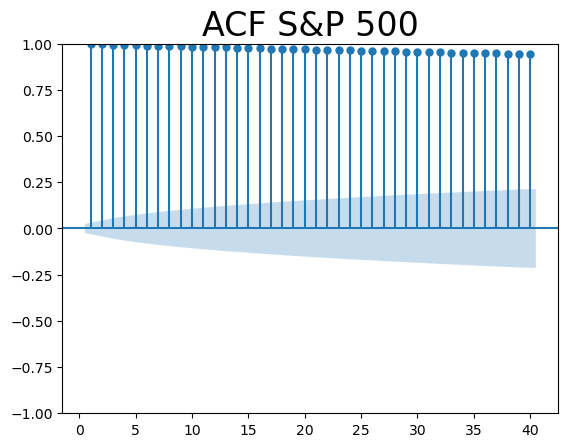

In [136]:
plot_acf(new_df.ftse, lags=40, zero=False)
plt.title("ACF S&P 500", size=24)
plt.show()

In [98]:
model_ma_ret_norm = ARIMA(new_df.norm_ret, order=(0, 0, 1))
result_ma_ret_norm = model_ma_ret_norm.fit()
result_ma_ret_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -37730.335
Date:                Wed, 14 Feb 2024   AIC                          75466.671
Time:                        12:44:48   BIC                          75486.904
Sample:                    01-10-1994   HQIC                         75473.681
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0762      1.192      2.581      0.010       0.740       5.412
ma.L1         -0.0727      0.007    -10.008      0.000      -0.087      -0.058
sigma2      9761.9156     74.637    130.792      0.000    9615.630    9908.201
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             21915.24
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
model_ma_ret_norm2 = ARIMA(new_df.norm_ret, order=(0, 0, 2))
result_ma_ret_norm2 = model_ma_ret_norm2.fit()
result_ma_ret_norm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -37725.774
Date:                Wed, 14 Feb 2024   AIC                          75459.548
Time:                        12:47:33   BIC                          75486.526
Sample:                    01-10-1994   HQIC                         75468.895
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0762      1.164      2.642      0.008       0.794       5.358
ma.L1         -0.0708      0.007     -9.718      0.000      -0.085      -0.057
ma.L2         -0.0389      0.006     -6.516      0.000      -0.051      -0.027
sigma2      9752.9079     78.157    124.787      0.000    9599.724    9906.092
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20572.92
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
df = pd.read_csv(
    "daily-total-female-births-CA.csv",
    header=0,
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
df.select_dtypes(include="object").head()

,date
0,1959-01-01
1,1959-01-02
2,1959-01-03
3,1959-01-04
4,1959-01-05


In [17]:
# parse_dates argument converts the column to datetime
df2 = pd.read_csv("daily-total-female-births-CA.csv",
                  header=0, parse_dates=[0])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [10]:
df2.head(), df2.shape

(        date  births
 0 1959-01-01      35
 1 1959-01-02      32
 2 1959-01-03      30
 3 1959-01-04      31
 4 1959-01-05      44,
 (365, 2))

In [11]:
series = pd.read_csv('daily-total-female-births-CA.csv',
                     header=0, parse_dates=[0], index_col=0)

series.head(), series.shape

(            births
 date              
 1959-01-01      35
 1959-01-02      32
 1959-01-03      30
 1959-01-04      31
 1959-01-05      44,
 (365, 1))

In [12]:
series.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [23]:
new_df2 = df2.copy()
new_df2["year"] = df2["date"].dt.year
new_df2["month"] = df2["date"].dt.month
new_df2["day"] = df2["date"].dt.day
new_df2["lag2"] = df2["births"].shift(2)
new_df2["lag365"] = df2["births"].shift(365)
new_df2["rolling_mean"] = df2["births"].rolling(window=2).mean()
new_df2["rolling_std"] = df2["births"].rolling(window=2).std()
new_df2["rolling_max"] = df2["births"].rolling(window=2).max()
new_df2["rolling_min"] = df2["births"].rolling(window=2).min()
new_df2["rolling_sum"] = df2["births"].rolling(window=2).sum()
new_df2["Max_Expanding"] = df2["births"].expanding().max()
new_df2.head(10)

,date,births,year,month,day,lag2,lag365,rolling_mean,rolling_std,rolling_max,rolling_min,rolling_sum,Max_Expanding
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,NaN,NaN,33.5,2.121320,35.0,32.0,67.0,35.0
2,1959-01-03,30,1959,1,3,35.0,NaN,31.0,1.414214,32.0,30.0,62.0,35.0
3,1959-01-04,31,1959,1,4,32.0,NaN,30.5,0.707107,31.0,30.0,61.0,35.0
4,1959-01-05,44,1959,1,5,30.0,NaN,37.5,9.192388,44.0,31.0,75.0,44.0
5,1959-01-06,29,1959,1,6,31.0,NaN,36.5,10.606602,44.0,29.0,73.0,44.0
6,1959-01-07,45,1959,1,7,44.0,NaN,37.0,11.313708,45.0,29.0,74.0,45.0
7,1959-01-08,43,1959,1,8,29.0,NaN,44.0,1.414214,45.0,43.0,88.0,45.0
8,1959-01-09,38,1959,1,9,45.0,NaN,40.5,3.535534,43.0,38.0,81.0,45.0
9,1959-01-10,27,1959,1,10,43.0,NaN,32.5,7.778175,38.0,27.0,65.0,45.0


<Axes: xlabel='date'>

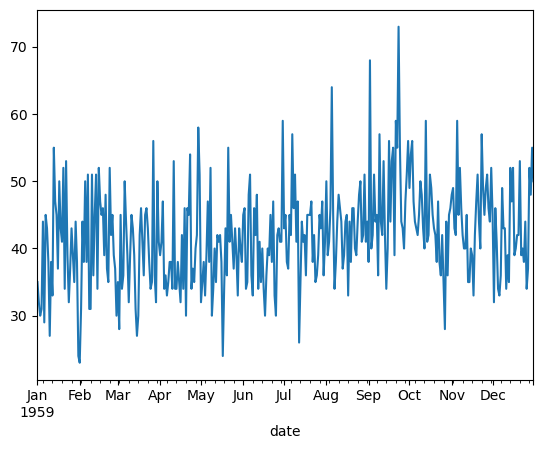

In [26]:
new_df3 = df2.copy()
new_df3.index = new_df3["date"]
new_df3["births"].plot()

In [27]:
new_df3.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


<Axes: xlabel='date'>

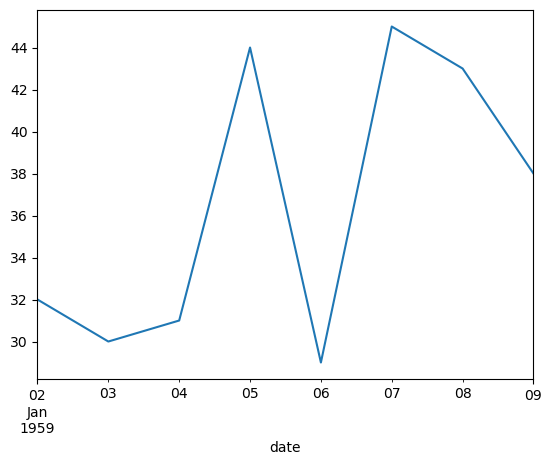

In [30]:
new_df4 = new_df3[(new_df3["date"] > "1959-01-01") &
                  (new_df3["date"] < "1959-01-10")]
new_df4["births"].plot()

## Checking for trend

<Axes: ylabel='births'>

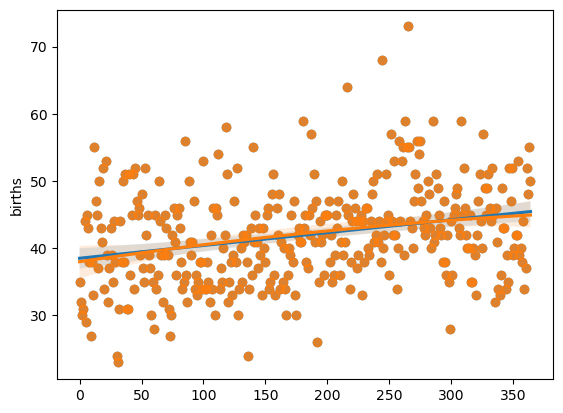

In [36]:
sns.regplot(x=new_df2.index.values, y=new_df2["births"])
sns.regplot(x=new_df2.index.values, y=new_df2["births"], order=2)

# sns

In [37]:
mlines = pd.read_csv(
    "us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])
mlines.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<Axes: >

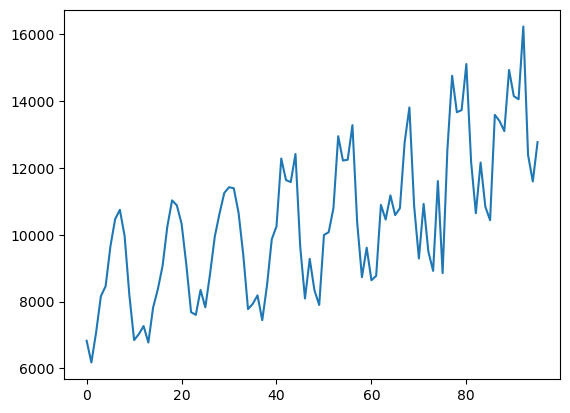

In [38]:
mlines["MilesMM"].plot()

<Axes: ylabel='MilesMM'>

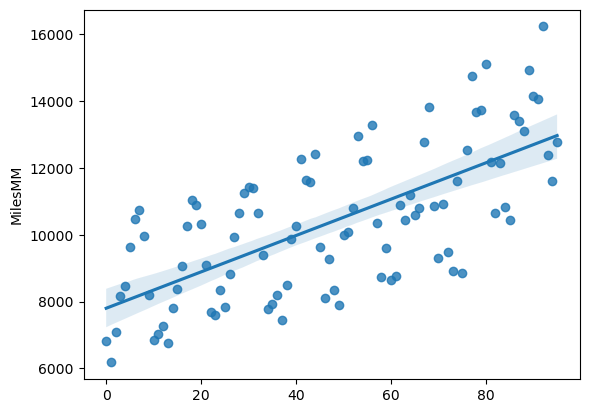

In [39]:
sns.regplot(x=mlines.index.values, y=mlines["MilesMM"])

In [40]:
mlines.index = mlines["Month"]

<Axes: xlabel='Month'>

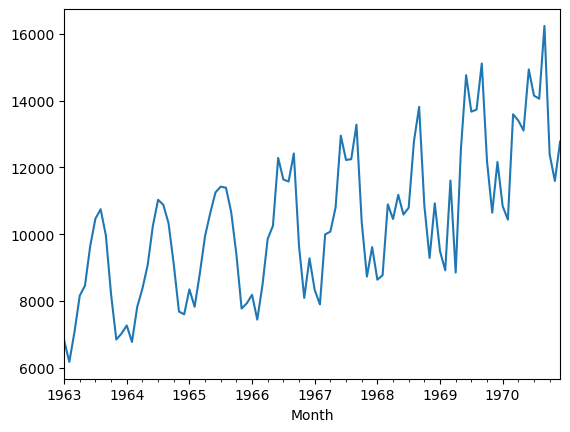

In [43]:
mlines["MilesMM"].plot()

## Seasonality

In [44]:
mlines['year'] = mlines["Month"].dt.year

<Axes: xlabel='year'>

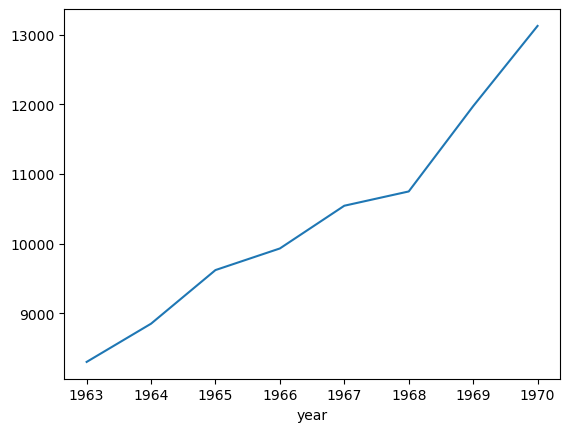

In [46]:
# smooth out the seasonality effects
mlines.groupby("year")["MilesMM"].mean().plot()

## Autocorrelation

In [47]:
mlines["lag1"] = mlines["MilesMM"].shift(1)

<Axes: xlabel='lag1', ylabel='MilesMM'>

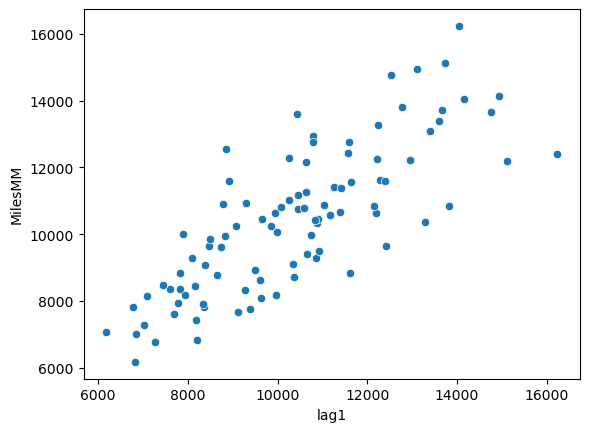

In [54]:
sns.scatterplot(x=mlines["lag1"], y=mlines["MilesMM"])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

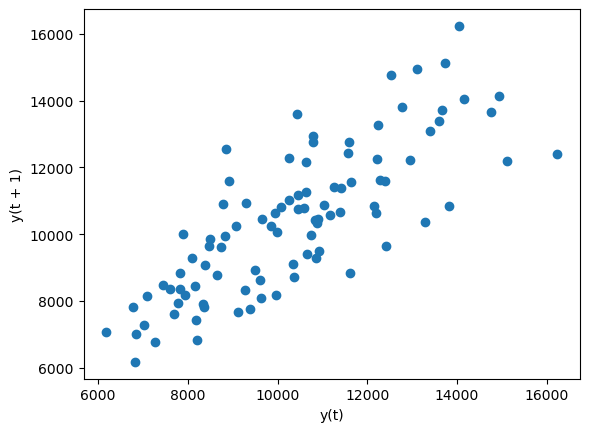

In [52]:
from pandas.plotting import lag_plot

lag_plot(mlines["MilesMM"], lag=1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

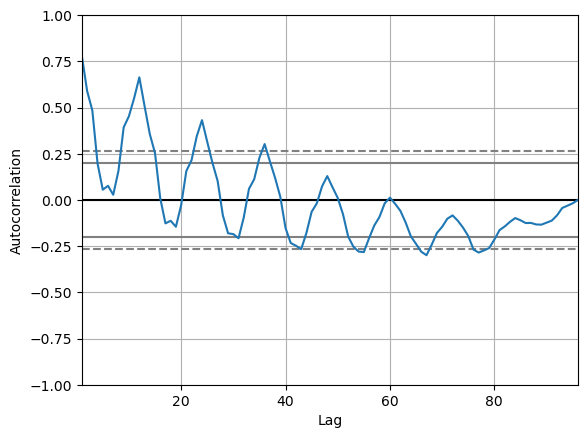

In [55]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(mlines["MilesMM"])

Power transformation linearise the relation between the data

Moving average smoothing is removing the noise and finding the underlining process (can be use as a baseline estimate)
Exponential Smoothing is the weighted average value where larger weight are assigned to the latest values and smaller weights to older values. we only use moving average smoothing and exponential smoothing, where there is no trend or seasonality in the series.

Train-test set. Do not shuffle data as is done for other time ML applications
walk forward validation - repeatedly train


In [56]:
data = pd.read_csv("daily-min-temperatures.csv", header=0, parse_dates=[0])

In [57]:
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [58]:
data.shape

(3650, 2)

In [59]:
train_size = int(data.shape[0] * 0.8)  # 80% of the data
train_size

2920

In [60]:
new_train = data[0:train_size]
new_test = data[train_size:]
new_train.shape, new_test.shape

((2920, 2), (730, 2))

### Naive Persistence Model

In [61]:
# Naive Forecast

data2 = pd.read_csv("daily-min-temperatures.csv", header=0, parse_dates=[0])

data2["t"] = data2["Temp"].shift(1)

data2.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [69]:
new_train, new_test = (
    data2[1 : data2.shape[0] - 7],
    data2[data2.shape[0] - 7 :],
)  # 7 days are for testing

In [70]:
new_train.head(), new_test.head()

(        Date  Temp     t
 1 1981-01-02  17.9  20.7
 2 1981-01-03  18.8  17.9
 3 1981-01-04  14.6  18.8
 4 1981-01-05  15.8  14.6
 5 1981-01-06  15.8  15.8,
            Date  Temp     t
 3643 1990-12-25  12.9  10.0
 3644 1990-12-26  14.6  12.9
 3645 1990-12-27  14.0  14.6
 3646 1990-12-28  13.6  14.0
 3647 1990-12-29  13.5  13.6)

In [71]:
train_X, train_y = new_train["t"], new_train["Temp"]
test_X, test_y = new_test["t"], new_test["Temp"]

In [72]:
new_predictions = test_X.copy()

In [73]:
# this tells whehter the data is a random walk or not when advance model does not do better tha this value
new_mse = mean_squared_error(test_y, new_predictions)
new_mse

3.4228571428571413

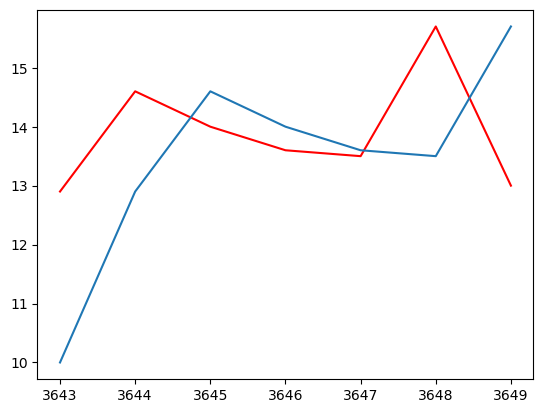

In [76]:
plt.plot(test_y, "r-")
plt.plot(new_predictions)

## Auto Regression

Used when there is no trend nor seasonality

In [2]:
from statsmodels.tsa.ar_model import AutoReg

data3 = pd.read_csv(
    "daily-min-temperatures.csv", header=0, parse_dates=[0], index_col=0
)
data3 = data3.values
new_train, new_test = (
    data3[1:-7],
    data3[-7:],
)  # 7 days are for testing


ARmodel = AutoReg(new_train, lags=29)
ARmodel_fit = ARmodel.fit()
print(f"coefficients: {ARmodel_fit.params}")

coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


In [5]:
new_predictions = ARmodel_fit.predict(
    start=len(new_train), end=len(new_train) + len(new_test) - 1, dynamic=False
)
for i in range(len(new_predictions)):
    print(f"predicted={new_predictions[i]}, expected={new_test[i]}")

new_mse = mean_squared_error(new_test, new_predictions)
print(f"Test MSE: {new_mse}")

predicted=11.871274847727818, expected=[12.9]
predicted=13.053794217229791, expected=[14.6]
predicted=13.532590951105092, expected=[14.]
predicted=13.243126458186186, expected=[13.6]
predicted=13.091438030687941, expected=[13.5]
predicted=13.146988838852195, expected=[15.7]
predicted=13.176153455574172, expected=[13.]
Test MSE: 1.5015252310070235


In [6]:
# walk forward validation
lag_window = 29
history = new_train[len(new_train) - lag_window :]
history = [history[i] for i in range(len(history))]
predictions = list()
coef = ARmodel_fit.params

In [7]:
from matplotlib.pyplot import hist


for t in range(len(new_test)):
    length = len(history)
    lag = [history[i] for i in range(length-lag_window, length)]
    yhat = coef[0]
    for d in range(lag_window):
        yhat += coef[d+1]*lag[lag_window-d-1]
    obs = new_test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f"predicted={yhat}, expected={obs}")

predicted=[11.87127485], expected=[12.9]
predicted=[13.65929693], expected=[14.6]
predicted=[14.34924559], expected=[14.]
predicted=[13.42745378], expected=[13.6]
predicted=[13.37487746], expected=[13.5]
predicted=[13.47999077], expected=[15.7]
predicted=[14.76514638], expected=[13.]


In [8]:
print(f"Test MSE: {mean_squared_error(new_test, predictions)}")

Test MSE: 1.4506829660623894


## Moving average Models

In [10]:
df = pd.read_csv("daily-min-temperatures.csv",
                 header=0, parse_dates=[0], index_col=0)

df["t"] = df["Temp"].shift(1)

df["resid"] = df["Temp"] - df["t"]

df.head()

,Temp,t,resid
Date,,,
1981-01-01,20.7,NaN,NaN
1981-01-02,17.9,20.7,-2.8
1981-01-03,18.8,17.9,0.9
1981-01-04,14.6,18.8,-4.2
1981-01-05,15.8,14.6,1.2


In [14]:
train, test = df["resid"][1:-7], df["resid"][-7:]
train.shape, test.shape

((3642,), (7,))

In [15]:
model = AutoReg(train, lags=29)
model_fit = model.fit()
model_fit.params

/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const       -0.006415
resid.L1    -0.407139
resid.L2    -0.496194
resid.L3    -0.445747
resid.L4    -0.403706
resid.L5    -0.362528
resid.L6    -0.334810
resid.L7    -0.288468
resid.L8    -0.274281
resid.L9    -0.235333
resid.L10   -0.234799
resid.L11   -0.228532
resid.L12   -0.208608
resid.L13   -0.180324
resid.L14   -0.178425
resid.L15   -0.152265
resid.L16   -0.143617
resid.L17   -0.132501
resid.L18   -0.097075
resid.L19   -0.104927
resid.L20   -0.079371
resid.L21   -0.059348
resid.L22   -0.045921
resid.L23   -0.063197
resid.L24   -0.063441
resid.L25   -0.045061
resid.L26   -0.023578
resid.L27   -0.011882
resid.L28   -0.003789
resid.L29   -0.003422
dtype: float64

In [18]:
pred_resid = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
pred_resid

/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index

3642    2.004986
3643    1.264192
3644    0.510869
3645   -0.251687
3646   -0.122054
3647    0.077509
3648    0.055600
dtype: float64

In [25]:
new_pred = df["t"][-7:].values + pred_resid.values
new_pred

array([12.00498584, 14.16419221, 15.11086935, 13.74831293, 13.477946  ,
       13.57750947, 15.75559998])

In [24]:
df["t"][-7:], pred_resid, 

(Date
 1990-12-25    10.0
 1990-12-26    12.9
 1990-12-27    14.6
 1990-12-28    14.0
 1990-12-29    13.6
 1990-12-30    13.5
 1990-12-31    15.7
 Name: t, dtype: float64,
 3642    2.004986
 3643    1.264192
 3644    0.510869
 3645   -0.251687
 3646   -0.122054
 3647    0.077509
 3648    0.055600
 dtype: float64)

In [27]:
print(f"Test MSE: {mean_squared_error(test.values, new_pred)}")

Test MSE: 191.38293418749888
